Assignment-2: Problems using Data Preprocessing 

Estimate the total compensation to be provided to an employee

1.IMPORTING THE LIBRARIES

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

In [40]:
data = pd.read_csv('train_set.csv')
data

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,Public Protection,JUV,Juvenile Probation,250,"SEIU - Health Workers, Local 1021",Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594


In [42]:
data.shape

(287836, 15)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287836 entries, 0 to 287835
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                287836 non-null  int64  
 1   OGC                 287836 non-null  int64  
 2   OG                  287836 non-null  object 
 3   DC                  287836 non-null  object 
 4   Dept                287836 non-null  object 
 5   UC                  287836 non-null  int64  
 6   Union               287800 non-null  object 
 7   JF                  287798 non-null  object 
 8   Job                 287836 non-null  object 
 9   EI                  287836 non-null  int64  
 10  Salaries            287836 non-null  int64  
 11  Overtime            287836 non-null  int64  
 12  H/D                 287836 non-null  float64
 13  YT                  287836 non-null  object 
 14  Total_Compensation  287836 non-null  int64  
dtypes: float64(1), int64(7), object(7)

In [48]:
data.describe()

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
count,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000
mean,2014.250104,2.976007,490.540186,26913.060020,63262.713139,4401.037115,8932.876472,97990.329882
std,1.016282,1.575586,333.238723,15539.719696,44638.657748,11079.137749,4894.072024,67750.020573
min,2013.000000,1.000000,1.000000,1.000000,-68771.000000,-12308.000000,-2940.470000,-74082.000000
25%,2013.000000,2.000000,236.000000,13434.000000,23406.000000,0.000000,4358.347500,35977.000000
50%,2014.000000,2.000000,535.000000,27013.000000,62504.500000,0.000000,11982.035000,98033.000000
75%,2015.000000,4.000000,790.000000,40397.250000,93000.250000,2738.000000,12801.790000,142138.250000
max,2016.000000,7.000000,990.000000,53794.000000,515101.000000,227313.000000,21872.800000,653498.000000


In [50]:
data.columns

Index(['Year', 'OGC', 'OG', 'DC', 'Dept', 'UC', 'Union', 'JF', 'Job', 'EI',
       'Salaries', 'Overtime', 'H/D', 'YT', 'Total_Compensation'],
      dtype='object')

In [52]:
data1 = data.drop(['Year','OGC','OG','DC','Dept','UC','Union','JF','Job','EI','H/D','YT'],axis=1)

In [54]:
data1.isnull().sum()

Salaries              0
Overtime              0
Total_Compensation    0
dtype: int64

<Figure size 720x360 with 0 Axes>

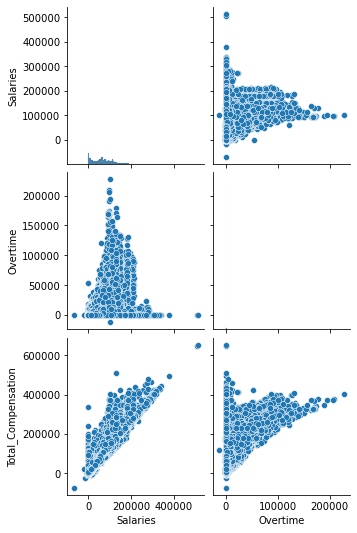

In [64]:
plt.figure(figsize=(10,5))
sns.pairplot(data1, x_vars = ['Salaries','Overtime'])

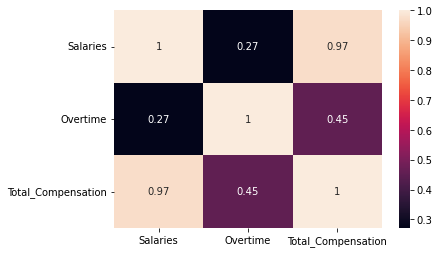

In [66]:
sns.heatmap(data1.corr(), annot = True)
plt.show()

In [94]:
X = data[['Salaries', 'Overtime', 'H/D']]
y = data['Total_Compensation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
column_transformer = make_column_transformer(
    (SimpleImputer(strategy='mean'), ['Salaries', 'Overtime', 'H/D']),
    remainder='passthrough'
)

In [98]:
model = make_pipeline(column_transformer, StandardScaler(), LinearRegression())

In [100]:
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('simpleimputer',
                                                  SimpleImputer(),
                                                  ['Salaries', 'Overtime',
                                                   'H/D'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [102]:
y_pred = model.predict(X_test)

In [104]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [106]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 58646458.4889762
Mean Absolute Error: 4108.185364329771
R-squared: 0.9871713964122532


In [108]:
X = data[['Salaries', 'Overtime', 'H/D']]  # Include other relevant features as needed
estimated_total_compensation = model.predict(X)

In [110]:
data['Estimated_Total_Compensation'] = estimated_total_compensation
data

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation,Estimated_Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158,16273.527930
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784,115143.857758
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708,145132.271104
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323,260320.121427
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106,85502.667201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079,153804.475690
287832,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Librarian 1,790,30704,0,5465.57,Calendar,40174,46502.975728
287833,2014,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669,150908.801048
287834,2013,1,Public Protection,JUV,Juvenile Probation,250,"SEIU - Health Workers, Local 1021",Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594,23752.180152


In [112]:
X1 = data1.drop('Total_Compensation', axis = 1)
Y1 = data1['Total_Compensation']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.3, random_state =10)

In [114]:
lr = LinearRegression()

In [116]:
X1_train_sm = sm.add_constant(X1_train)
lr = sm.OLS(Y1_train, X1_train_sm).fit()

In [118]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Compensation   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 6.383e+06
Date:                Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:41:31   Log-Likelihood:            -2.1076e+06
No. Observations:              201485   AIC:                         4.215e+06
Df Residuals:                  201482   BIC:                         4.215e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4418.2189     32.647    135.332      0.000    4354.231    4482.207
Salaries       1.3923      0.000   3175.188      0.000       1.391       1.393
Overtime       1.2484      0.002    709.784      0.000       1.245       1.252
==============================================================================
Omnibus:                   198680.539   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47341356.064
Skew:                           4.301   Prob(JB):                         0.00
Kurtosis:                      77.600   Cond. No.                     1.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
lr.params

const       4418.218949
Salaries       1.392334
Overtime       1.248357
dtype: float64

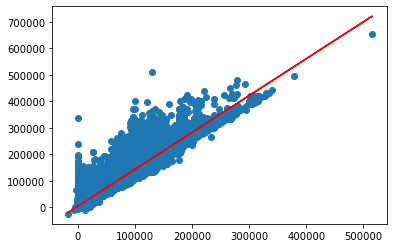

In [148]:
X1_train_1=X1_train.iloc[:,0]
plt.scatter(X1_train_1, Y1_train)
plt.plot(X1_train_1, 4418.218949 + 1.392334*X1_train_1, 'r')
plt.show()

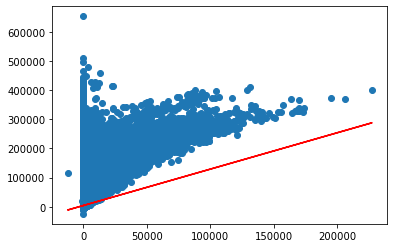

In [136]:
X1_train_2=X1_train.iloc[:,-1]
plt.scatter(X1_train_2, Y1_train)
plt.plot(X1_train_2, 4418.218949 + 1.248357*X1_train_2, 'r')
plt.show()